In [1]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 202.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 255.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 178.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 199.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 152.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.22.0 requires urllib3<2.0, but you have urllib3 2.2.1 which is incompatible.
tensorflow 2.13.

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [5]:
import os
os.mkdir('output')

os.mkdir('checkpoint')

os.mkdir('chart')

In [3]:
import time
import os

import numpy as np
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [5]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

val_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [6]:
dataset_dir = 'Fruit-Project_split'

In [7]:
train_path = os.path.join(dataset_dir, 'train')
val_path = os.path.join(dataset_dir, 'val')
print('Training_set_path', train_path)
print('Val_set_path', val_path)

Training_set_path Fruit-Project_split/train
Val_set_path Fruit-Project_split/val


In [8]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(train_path, train_transform)

val_dataset = datasets.ImageFolder(val_path, train_transform)

In [9]:
print('Number of training set images', len(train_dataset))
print('No. of categories', len(train_dataset.classes))
print('Name of each category', train_dataset.classes)

Number of training set images 30778
No. of categories 44
Name of each category ['alligator apple', 'apple', 'avocado', 'banana', 'barberry', 'bayberry', 'bell pepper', 'black berry', 'black cherry', 'blueberry', 'bottle gourd', 'cantaloupe', 'carambola', 'cherry', 'coconut', 'corn kernel', 'custard apple', 'dragonfruit', 'durian', 'eggplant', 'fig', 'grape', 'jackfruit', 'jalapeno', 'kiwi', 'lemon', 'lime', 'longan', 'macadamia', 'mango', 'orange', 'papaya', 'pea', 'peanut', 'pear', 'persimmon', 'pineapple', 'pomegranate', 'pumpkin', 'saguaro', 'strawberry', 'tomato', 'watermelon', 'zucchini']


In [10]:
print('Number of val set images', len(val_dataset))
print('No. of categories', len(val_dataset.classes))
print('Name of each category', val_dataset.classes)

Number of val set images 8764
No. of categories 44
Name of each category ['alligator apple', 'apple', 'avocado', 'banana', 'barberry', 'bayberry', 'bell pepper', 'black berry', 'black cherry', 'blueberry', 'bottle gourd', 'cantaloupe', 'carambola', 'cherry', 'coconut', 'corn kernel', 'custard apple', 'dragonfruit', 'durian', 'eggplant', 'fig', 'grape', 'jackfruit', 'jalapeno', 'kiwi', 'lemon', 'lime', 'longan', 'macadamia', 'mango', 'orange', 'papaya', 'pea', 'peanut', 'pear', 'persimmon', 'pineapple', 'pomegranate', 'pumpkin', 'saguaro', 'strawberry', 'tomato', 'watermelon', 'zucchini']


In [11]:
class_names = train_dataset.classes
n_class = len(class_names)

In [12]:
class_names

['alligator apple',
 'apple',
 'avocado',
 'banana',
 'barberry',
 'bayberry',
 'bell pepper',
 'black berry',
 'black cherry',
 'blueberry',
 'bottle gourd',
 'cantaloupe',
 'carambola',
 'cherry',
 'coconut',
 'corn kernel',
 'custard apple',
 'dragonfruit',
 'durian',
 'eggplant',
 'fig',
 'grape',
 'jackfruit',
 'jalapeno',
 'kiwi',
 'lemon',
 'lime',
 'longan',
 'macadamia',
 'mango',
 'orange',
 'papaya',
 'pea',
 'peanut',
 'pear',
 'persimmon',
 'pineapple',
 'pomegranate',
 'pumpkin',
 'saguaro',
 'strawberry',
 'tomato',
 'watermelon',
 'zucchini']

In [13]:
train_dataset.class_to_idx

{'alligator apple': 0,
 'apple': 1,
 'avocado': 2,
 'banana': 3,
 'barberry': 4,
 'bayberry': 5,
 'bell pepper': 6,
 'black berry': 7,
 'black cherry': 8,
 'blueberry': 9,
 'bottle gourd': 10,
 'cantaloupe': 11,
 'carambola': 12,
 'cherry': 13,
 'coconut': 14,
 'corn kernel': 15,
 'custard apple': 16,
 'dragonfruit': 17,
 'durian': 18,
 'eggplant': 19,
 'fig': 20,
 'grape': 21,
 'jackfruit': 22,
 'jalapeno': 23,
 'kiwi': 24,
 'lemon': 25,
 'lime': 26,
 'longan': 27,
 'macadamia': 28,
 'mango': 29,
 'orange': 30,
 'papaya': 31,
 'pea': 32,
 'peanut': 33,
 'pear': 34,
 'persimmon': 35,
 'pineapple': 36,
 'pomegranate': 37,
 'pumpkin': 38,
 'saguaro': 39,
 'strawberry': 40,
 'tomato': 41,
 'watermelon': 42,
 'zucchini': 43}

In [14]:
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [15]:
idx_to_labels

{0: 'alligator apple',
 1: 'apple',
 2: 'avocado',
 3: 'banana',
 4: 'barberry',
 5: 'bayberry',
 6: 'bell pepper',
 7: 'black berry',
 8: 'black cherry',
 9: 'blueberry',
 10: 'bottle gourd',
 11: 'cantaloupe',
 12: 'carambola',
 13: 'cherry',
 14: 'coconut',
 15: 'corn kernel',
 16: 'custard apple',
 17: 'dragonfruit',
 18: 'durian',
 19: 'eggplant',
 20: 'fig',
 21: 'grape',
 22: 'jackfruit',
 23: 'jalapeno',
 24: 'kiwi',
 25: 'lemon',
 26: 'lime',
 27: 'longan',
 28: 'macadamia',
 29: 'mango',
 30: 'orange',
 31: 'papaya',
 32: 'pea',
 33: 'peanut',
 34: 'pear',
 35: 'persimmon',
 36: 'pineapple',
 37: 'pomegranate',
 38: 'pumpkin',
 39: 'saguaro',
 40: 'strawberry',
 41: 'tomato',
 42: 'watermelon',
 43: 'zucchini'}

In [16]:
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_dataset.class_to_idx)

In [17]:
from torch.utils.data import DataLoader

In [18]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

val_loader = DataLoader(val_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

In [19]:
images, labels = next(iter(train_loader))

In [20]:
images.shape

torch.Size([32, 3, 224, 224])

In [21]:
labels

tensor([26, 25, 26, 30, 24, 15, 18, 24, 20, 32, 29, 43, 29, 19,  4, 34, 22, 14,
         1, 36, 26, 32, 43, 25,  3,  4, 35,  7, 10,  9, 25, 38])

In [22]:
images = images.numpy()

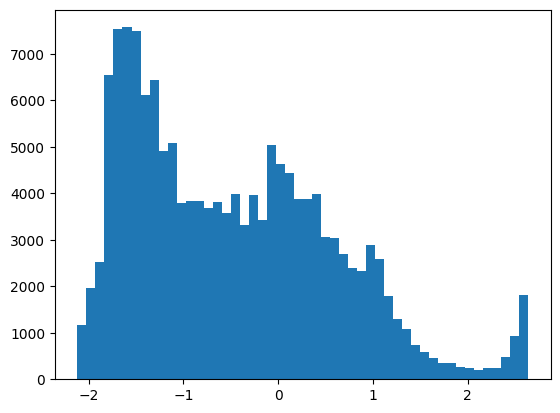

In [23]:
images[1].shape
plt.hist(images[1].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:26')

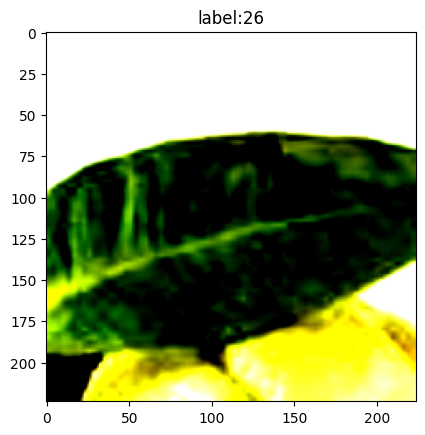

In [24]:
idx = 2
plt.imshow(images[idx].transpose((1,2,0)))
plt.title('label:'+str(labels[idx].item()))

In [25]:
label = labels[idx].item()

In [26]:
label

26

In [27]:
pred_classname = idx_to_labels[label]
pred_classname

'lime'

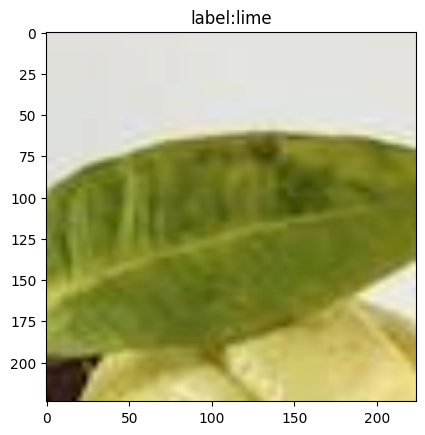

In [28]:
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname)
plt.show()

In [29]:
from torchvision import models
import torch.optim as optim
from torch.optim import lr_scheduler

In [30]:
import time
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# transfer learning

In [34]:
model = models.resnet50(pretrained=True)

model.fc = nn.Linear(model.fc.in_features, n_class)

optimizer = optim.Adam(model.parameters())

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 445MB/s]


In [49]:
model = models.alexnet(pretrained=True)

num_classes = 44
model.classifier[6] = nn.Linear(4096, num_classes)


In [52]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [53]:

model = model.to(device)

criterion = nn.CrossEntropyLoss() 

EPOCHS = 45
from torch.optim import lr_scheduler

lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [55]:
def train_one_batch(images, labels):
    
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images) 
    loss = criterion(outputs, labels) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1) 
    preds = preds.cpu().numpy()
    loss = loss.detach().cpu().numpy()
    outputs = outputs.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    log_train = {}
    log_train['epoch'] = epoch
    log_train['batch'] = batch_idx
   
    log_train['train_loss'] = loss
    log_train['train_accuracy'] = accuracy_score(labels, preds)
    log_train['train_precision'] = precision_score(labels, preds, average='macro')
    log_train['train_recall'] = recall_score(labels, preds, average='macro')
    log_train['train_f1-score'] = f1_score(labels, preds, average='macro')
    
    return log_train

In [56]:
def evaluate_valset():

    loss_list = []
    labels_list = []
    preds_list = []
    
    with torch.no_grad():
        for images, labels in val_loader: 
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images) 


            _, preds = torch.max(outputs, 1) 
            preds = preds.cpu().numpy()
            loss = criterion(outputs, labels) 
            loss = loss.detach().cpu().numpy()
            outputs = outputs.detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()

            loss_list.append(loss)
            labels_list.extend(labels)
            preds_list.extend(preds)
        
    log_val = {}
    log_val['epoch'] = epoch
    
    log_val['val_loss'] = np.mean(loss_list)
    log_val['val_accuracy'] = accuracy_score(labels_list, preds_list)
    log_val['val_precision'] = precision_score(labels_list, preds_list, average='macro')
    log_val['val_recall'] = recall_score(labels_list, preds_list, average='macro')
    log_val['val_f1-score'] = f1_score(labels_list, preds_list, average='macro')
    
    return log_val

In [57]:
epoch = 0
batch_idx = 0
best_val_accuracy = 0

In [58]:
import pandas as pd

df_train_log = pd.DataFrame()
log_train = {}
log_train['epoch'] = 0
log_train['batch'] = 0
images, labels = next(iter(train_loader))
log_train.update(train_one_batch(images, labels))
df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)

In [59]:
df_train_log

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,4.268657,0.0,0.0,0.0,0.0


In [60]:
df_val_log = pd.DataFrame()
log_val = {}
log_val['epoch'] = 0
log_val.update(evaluate_valset())
df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)

In [61]:
df_val_log

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,3.98627,0.024646,0.021907,0.025206,0.019768


In [62]:
import wandb

wandb.init(project='fruit44', name=time.strftime('%m%d%H%M%S'))

In [63]:
# for epoch in range(1, EPOCHS+1):
#     print(f'Epoch {epoch}/{EPOCHS}')

#     # Training
#     model.train()
#     total_batches = len(train_loader)
#     for batch_idx, (images, labels) in enumerate(train_loader, 1):
#         log_train = train_one_batch(images, labels)
#         df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
#         wandb.log(log_train)

#         # Display progress
#         print(f'Training Batch {batch_idx}/{total_batches}', end='\r')

#     lr_scheduler.step()

#     # Validation
#     model.eval()
#     log_val = evaluate_valset()
#     df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
#     wandb.log(log_val)

#     if log_val['val_accuracy'] > best_val_accuracy:
#         old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
#         if os.path.exists(old_best_checkpoint_path):
#             os.remove(old_best_checkpoint_path)

#         best_val_accuracy = log_val['val_accuracy']
#         new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
#         torch.save(model, new_best_checkpoint_path)
#         print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

# # Save logs to CSV
# df_train_log.to_csv('Training_log_training_sets.csv', index=False)
# df_val_log.to_csv('Training_Log_val_Set.csv', index=False)

for epoch in range(1, EPOCHS+1):
    
    print(f'Epoch {epoch}/{EPOCHS}')
    
    ## 训练阶段
    model.train()
    for images, labels in tqdm(train_loader): # 获得一个 batch 的数据和标注
        batch_idx += 1
        log_train = train_one_batch(images, labels)
        df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
        # wandb.log(log_train)
        
    lr_scheduler.step()

    ## 测试阶段
    model.eval()
    log_val = evaluate_valset()
    df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
    # wandb.log(log_val)
    
    # 保存最新的最佳模型文件
    if log_val['val_accuracy'] > best_val_accuracy: 
        # 删除旧的最佳模型文件(如有)
        old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
        if os.path.exists(old_best_checkpoint_path):
            os.remove(old_best_checkpoint_path)
        # 保存新的最佳模型文件
        best_val_accuracy = log_val['val_accuracy']
        new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
        torch.save(model, new_best_checkpoint_path)
        print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))
        # best_test_accuracy = log_test['test_accuracy']

df_train_log.to_csv('Training_log_training_Alex.csv', index=False)
df_val_log.to_csv('Training_Log_val_Alex.csv', index=False)

Epoch 1/45


100%|██████████| 962/962 [00:21<00:00, 44.82it/s]



Save the new best model checkpoint/best-0.729.pth
Epoch 2/45


100%|██████████| 962/962 [00:22<00:00, 43.52it/s]



Save the new best model checkpoint/best-0.756.pth
Epoch 3/45


100%|██████████| 962/962 [00:21<00:00, 45.53it/s]



Save the new best model checkpoint/best-0.782.pth
Epoch 4/45


100%|██████████| 962/962 [00:21<00:00, 44.15it/s]


Epoch 5/45


100%|██████████| 962/962 [00:21<00:00, 44.90it/s]



Save the new best model checkpoint/best-0.800.pth
Epoch 6/45


100%|██████████| 962/962 [00:21<00:00, 45.00it/s]



Save the new best model checkpoint/best-0.804.pth
Epoch 7/45


100%|██████████| 962/962 [00:21<00:00, 44.39it/s]



Save the new best model checkpoint/best-0.806.pth
Epoch 8/45


100%|██████████| 962/962 [00:22<00:00, 42.79it/s]



Save the new best model checkpoint/best-0.837.pth
Epoch 9/45


100%|██████████| 962/962 [00:22<00:00, 43.26it/s]



Save the new best model checkpoint/best-0.839.pth
Epoch 10/45


100%|██████████| 962/962 [00:22<00:00, 43.21it/s]


Epoch 11/45


100%|██████████| 962/962 [00:22<00:00, 43.21it/s]



Save the new best model checkpoint/best-0.847.pth
Epoch 12/45


100%|██████████| 962/962 [00:21<00:00, 45.09it/s]


Epoch 13/45


100%|██████████| 962/962 [00:22<00:00, 43.63it/s]



Save the new best model checkpoint/best-0.853.pth
Epoch 14/45


100%|██████████| 962/962 [00:22<00:00, 43.48it/s]


Epoch 15/45


100%|██████████| 962/962 [00:21<00:00, 43.86it/s]


Epoch 16/45


100%|██████████| 962/962 [00:22<00:00, 43.63it/s]


Epoch 17/45


100%|██████████| 962/962 [00:20<00:00, 46.26it/s]



Save the new best model checkpoint/best-0.855.pth
Epoch 18/45


100%|██████████| 962/962 [00:21<00:00, 44.49it/s]


Epoch 19/45


100%|██████████| 962/962 [00:22<00:00, 43.66it/s]


Epoch 20/45


100%|██████████| 962/962 [00:21<00:00, 44.74it/s]


Epoch 21/45


100%|██████████| 962/962 [00:22<00:00, 42.93it/s]


Epoch 22/45


100%|██████████| 962/962 [00:21<00:00, 43.90it/s]


Epoch 23/45


100%|██████████| 962/962 [00:22<00:00, 43.44it/s]


Epoch 24/45


100%|██████████| 962/962 [00:21<00:00, 44.26it/s]


Epoch 25/45


100%|██████████| 962/962 [00:21<00:00, 44.19it/s]


Epoch 26/45


100%|██████████| 962/962 [00:22<00:00, 43.14it/s]


Epoch 27/45


100%|██████████| 962/962 [00:22<00:00, 42.30it/s]


Epoch 28/45


100%|██████████| 962/962 [00:22<00:00, 43.65it/s]


Epoch 29/45


100%|██████████| 962/962 [00:22<00:00, 42.72it/s]


Epoch 30/45


100%|██████████| 962/962 [00:22<00:00, 42.88it/s]


Epoch 31/45


100%|██████████| 962/962 [00:22<00:00, 43.13it/s]



Save the new best model checkpoint/best-0.856.pth
Epoch 32/45


100%|██████████| 962/962 [00:22<00:00, 42.85it/s]


Epoch 33/45


100%|██████████| 962/962 [00:22<00:00, 42.24it/s]


Epoch 34/45


100%|██████████| 962/962 [00:22<00:00, 42.57it/s]


Epoch 35/45


100%|██████████| 962/962 [00:22<00:00, 41.97it/s]


Epoch 36/45


100%|██████████| 962/962 [00:22<00:00, 42.46it/s]


Epoch 37/45


100%|██████████| 962/962 [00:22<00:00, 42.03it/s]


Epoch 38/45


100%|██████████| 962/962 [00:22<00:00, 42.44it/s]


Epoch 39/45


100%|██████████| 962/962 [00:22<00:00, 42.29it/s]


Epoch 40/45


100%|██████████| 962/962 [00:22<00:00, 41.84it/s]


Epoch 41/45


100%|██████████| 962/962 [00:22<00:00, 42.94it/s]


Epoch 42/45


100%|██████████| 962/962 [00:22<00:00, 43.37it/s]


Epoch 43/45


100%|██████████| 962/962 [00:23<00:00, 41.78it/s]


Epoch 44/45


100%|██████████| 962/962 [00:22<00:00, 42.65it/s]


Epoch 45/45


100%|██████████| 962/962 [00:23<00:00, 41.77it/s]


In [46]:
model = torch.load('checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

In [47]:
model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.4208917, 'val_accuracy': 0.8856686444545869, 'val_precision': 0.8856960740118999, 'val_recall': 0.8853617496455921, 'val_f1-score': 0.885066707024815}


In [48]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df_train = pd.read_csv('Training_log_training_sets.csv')
df_val = pd.read_csv('Training_Log_val_Set.csv')

In [51]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,3.845102,0.03125,0.009615,0.019231,0.012821
1,1,1,4.040941,0.12500,0.032381,0.120000,0.050000
2,1,2,4.034715,0.06250,0.049383,0.074074,0.055556
3,1,3,4.342201,0.03125,0.010753,0.032258,0.016129
4,1,4,4.072283,0.06250,0.028736,0.051724,0.034483
...,...,...,...,...,...,...,...
43286,45,43286,0.510250,0.87500,0.875000,0.916667,0.888889
43287,45,43287,0.213005,0.93750,0.892857,0.875000,0.880952
43288,45,43288,0.149522,0.93750,0.875000,0.892857,0.880952
43289,45,43289,0.364291,0.84375,0.801282,0.814103,0.793590


In [52]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,4.106773,0.036855,0.026463,0.036148,0.015634
1,1,1.680737,0.534117,0.585005,0.533797,0.526481
2,2,1.299113,0.643314,0.681127,0.643772,0.645693
3,3,1.080208,0.697056,0.739454,0.693827,0.699717
4,4,0.949100,0.741670,0.767198,0.735313,0.739272
5,5,0.805358,0.770082,0.785756,0.772486,0.771727
6,6,0.780892,0.785030,0.793950,0.784325,0.784564
7,7,0.755138,0.789137,0.804674,0.789118,0.788657
8,8,0.512506,0.859881,0.860007,0.858906,0.858786
9,9,0.489040,0.864788,0.866351,0.865347,0.864761


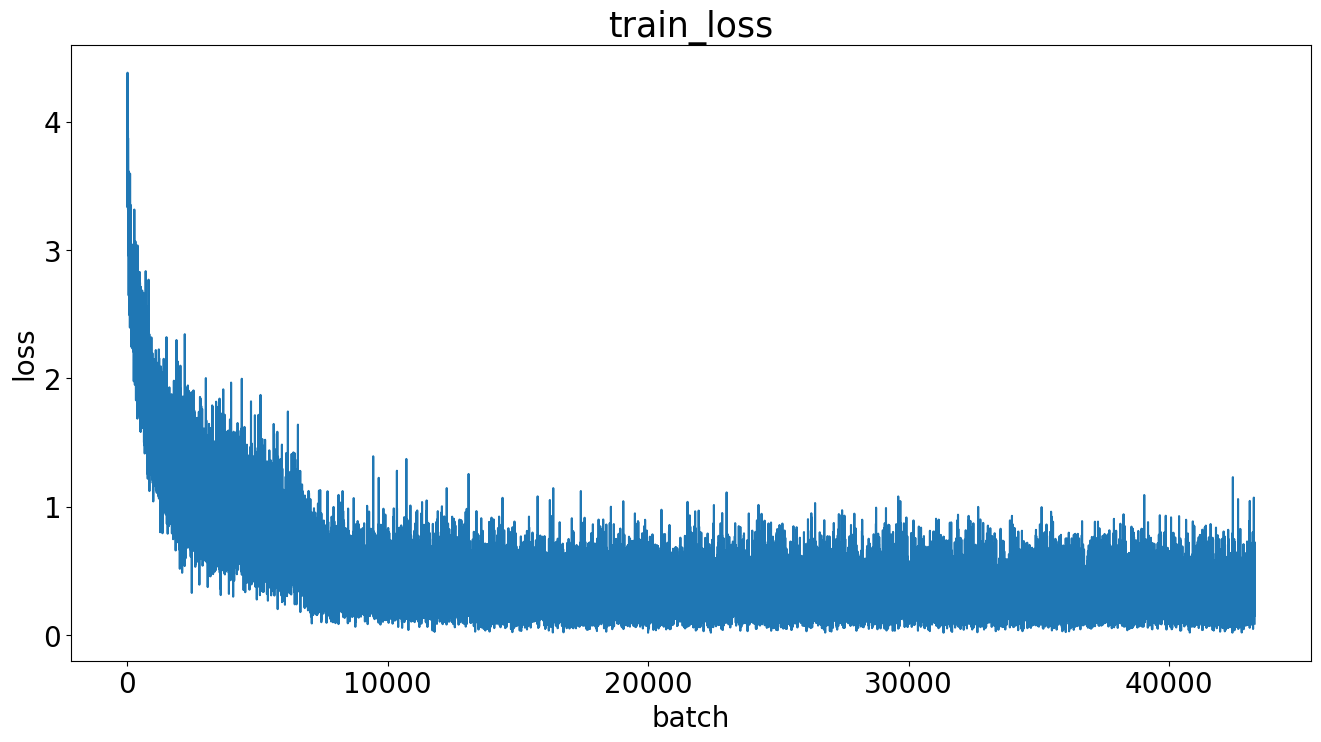

In [53]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

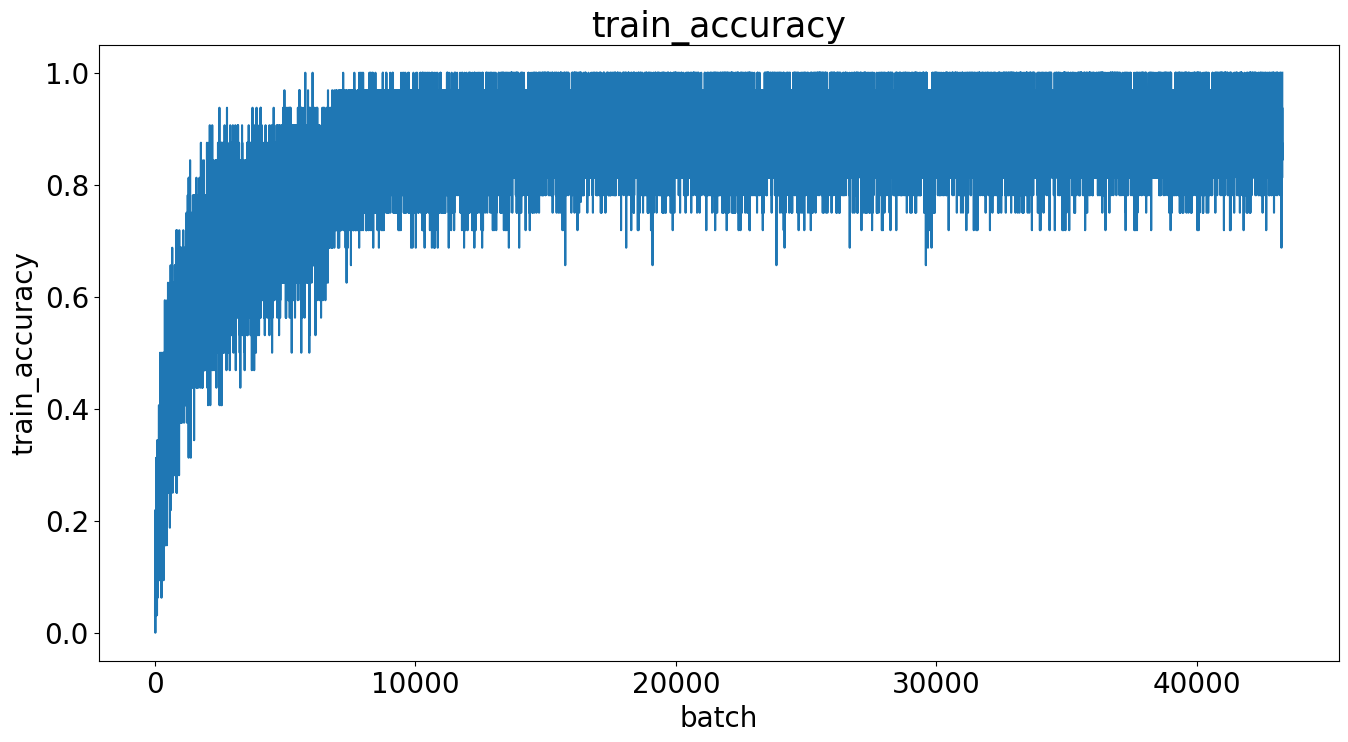

In [54]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=600, bbox_inches='tight')

plt.show()

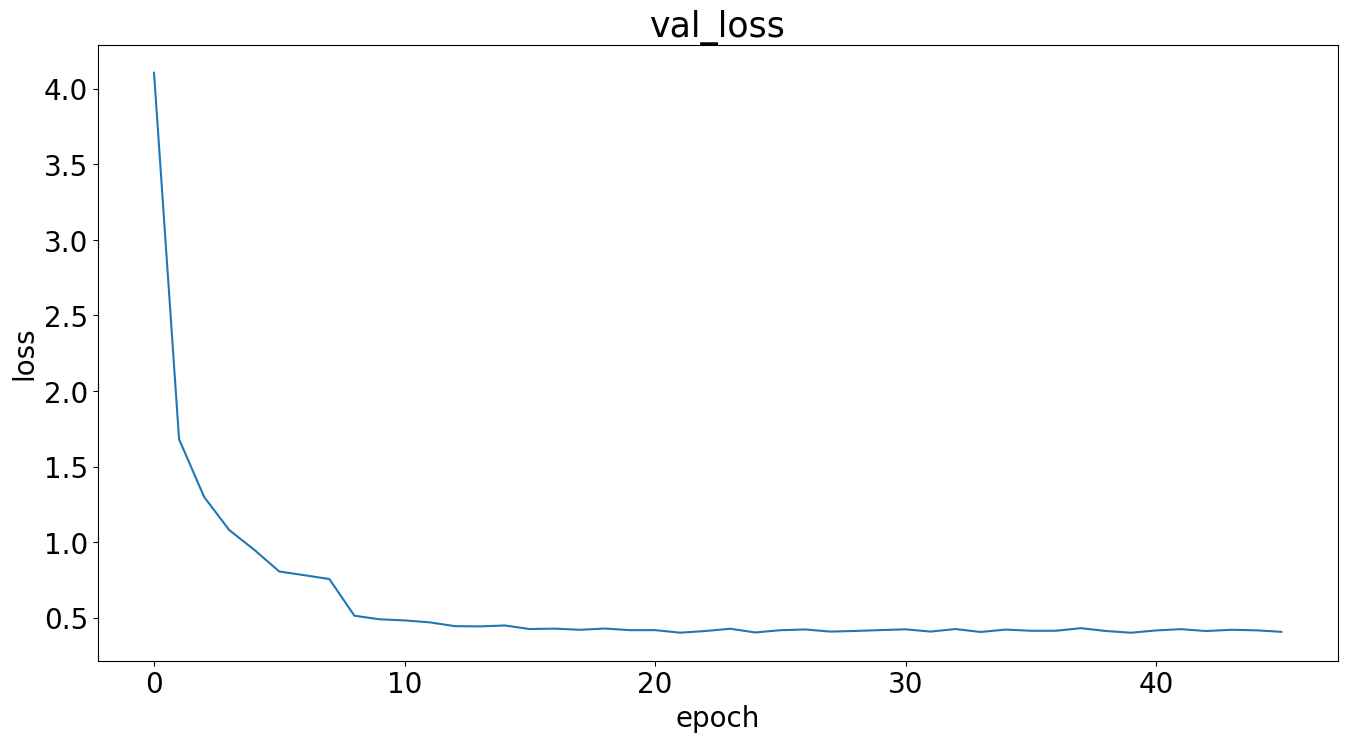

In [55]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

In [56]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [57]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

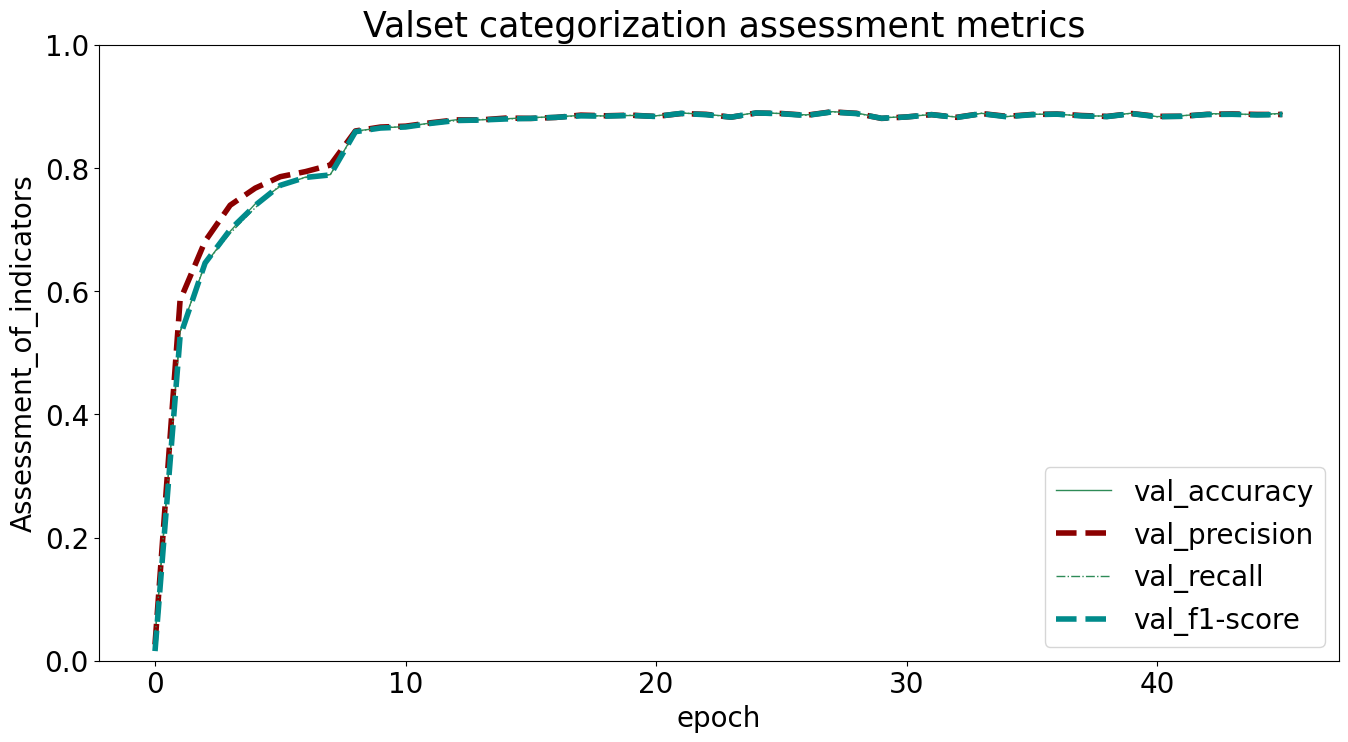

In [58]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# AlexNet

In [64]:
model = torch.load('checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

In [65]:
model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.53004295, 'val_accuracy': 0.853149246919215, 'val_precision': 0.8521207012319948, 'val_recall': 0.853283125138737, 'val_f1-score': 0.8523408602605017}


In [66]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df_train = pd.read_csv('Training_log_training_Alex.csv')
df_val = pd.read_csv('Training_Log_val_Alex.csv')

In [68]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,4.268657,0.000000,0.000000,0.000000,0.000000
1,1,1,4.282997,0.000000,0.000000,0.000000,0.000000
2,1,2,4.143528,0.000000,0.000000,0.000000,0.000000
3,1,3,3.741976,0.062500,0.015625,0.062500,0.024554
4,1,4,3.980201,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
43286,45,43286,0.284826,0.937500,0.931818,0.939394,0.930303
43287,45,43287,0.585339,0.750000,0.637931,0.643678,0.625287
43288,45,43288,0.142280,0.968750,0.937500,0.958333,0.944444
43289,45,43289,0.699695,0.781250,0.727273,0.681818,0.683983


In [69]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,3.986270,0.024646,0.021907,0.025206,0.019768
1,1,0.960518,0.728549,0.733847,0.729270,0.723616
2,2,0.851241,0.756047,0.766642,0.755447,0.755549
3,3,0.756294,0.781949,0.789949,0.782202,0.783382
4,4,0.776338,0.778754,0.788833,0.778741,0.777598
5,5,0.702536,0.799635,0.804953,0.798716,0.799741
6,6,0.680361,0.803971,0.807595,0.803741,0.803602
7,7,0.691992,0.805796,0.811570,0.804329,0.805307
8,8,0.585293,0.837061,0.835267,0.835996,0.835067
9,9,0.587628,0.839000,0.838549,0.838056,0.837486


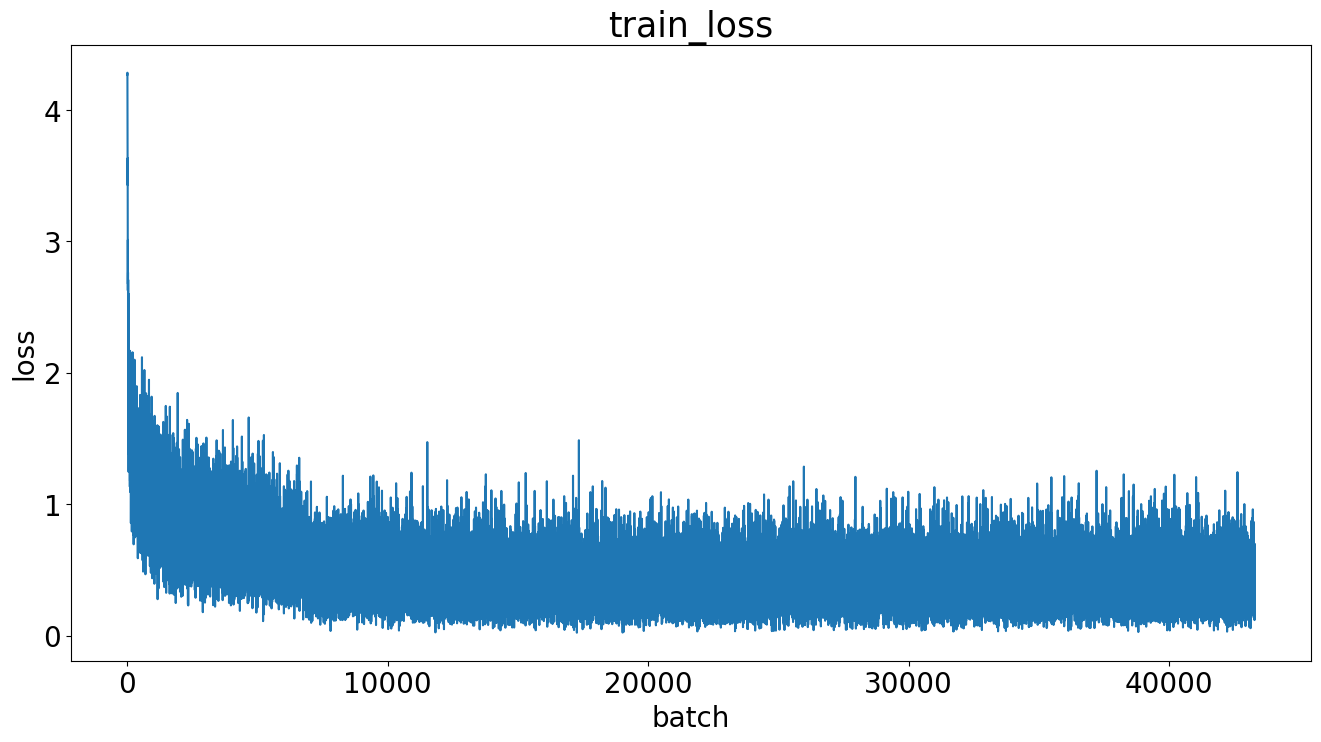

In [72]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

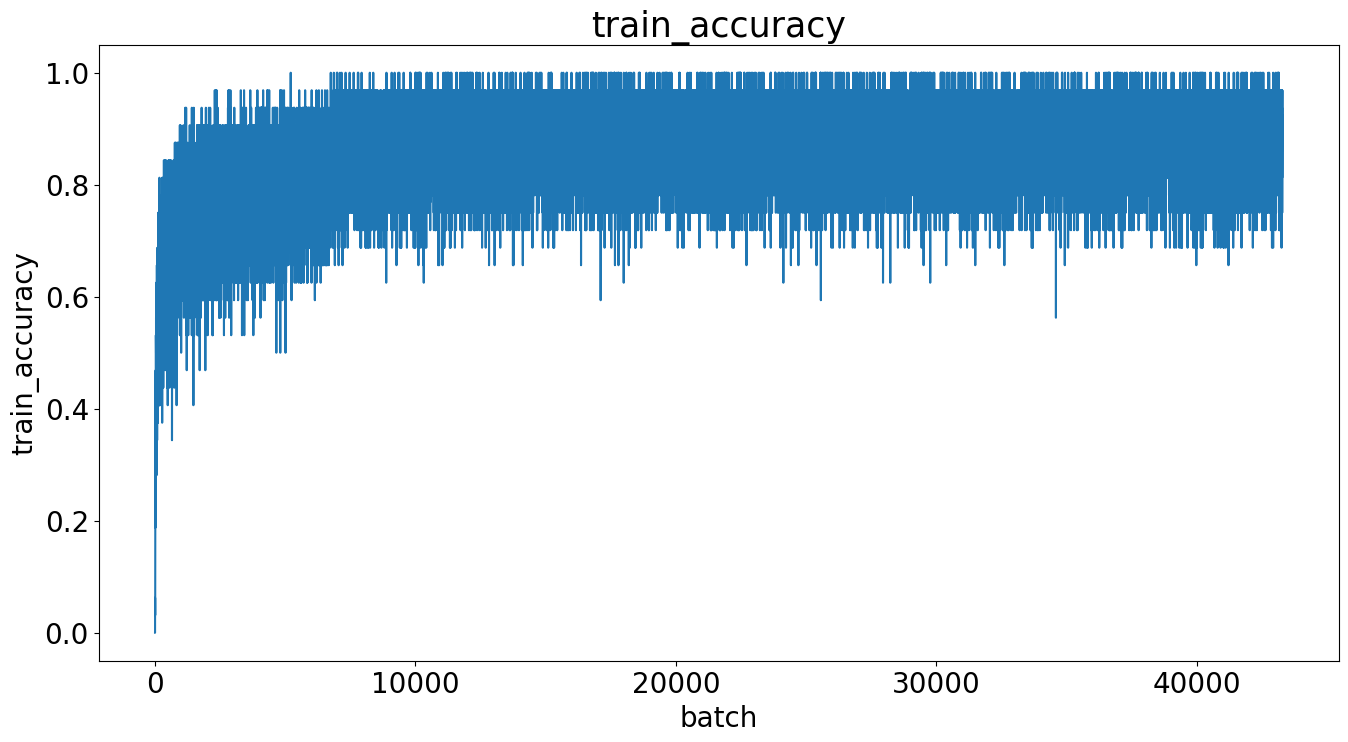

In [75]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=120, bbox_inches='tight')

plt.show()

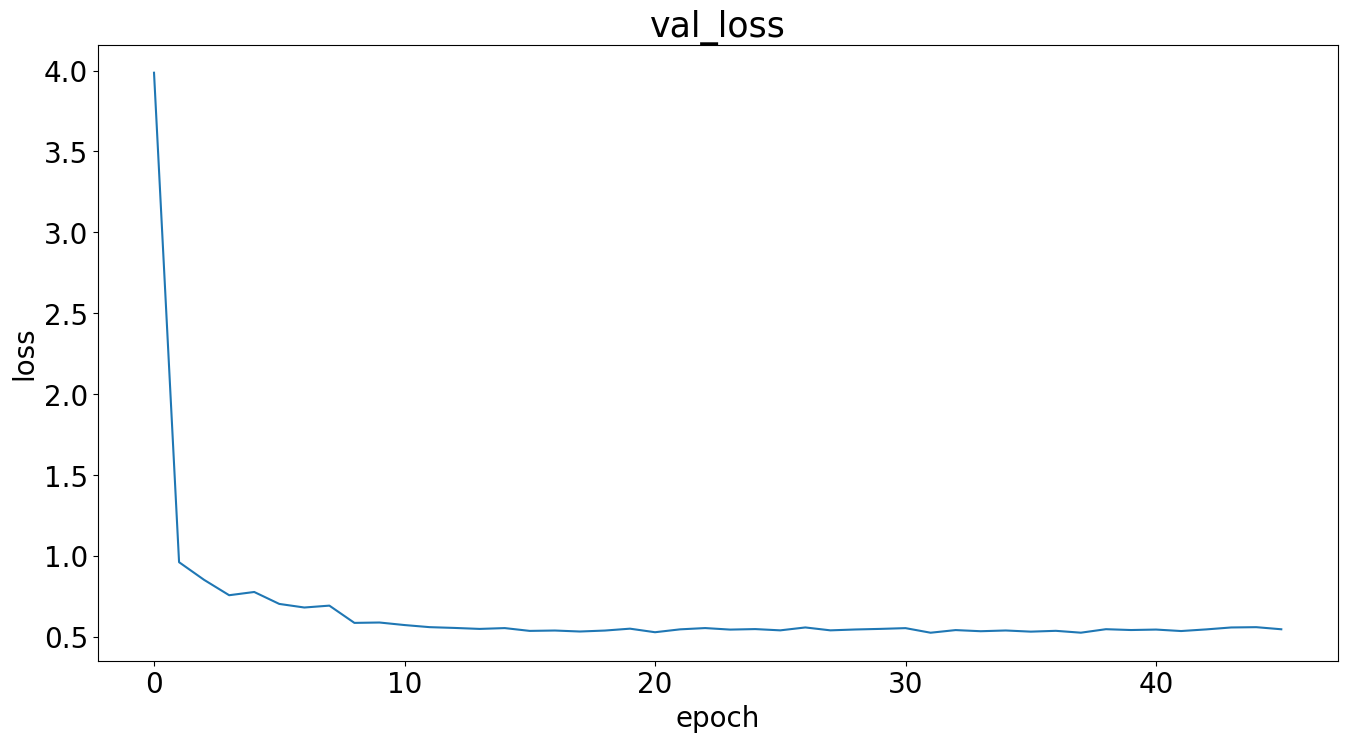

In [76]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [77]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [78]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

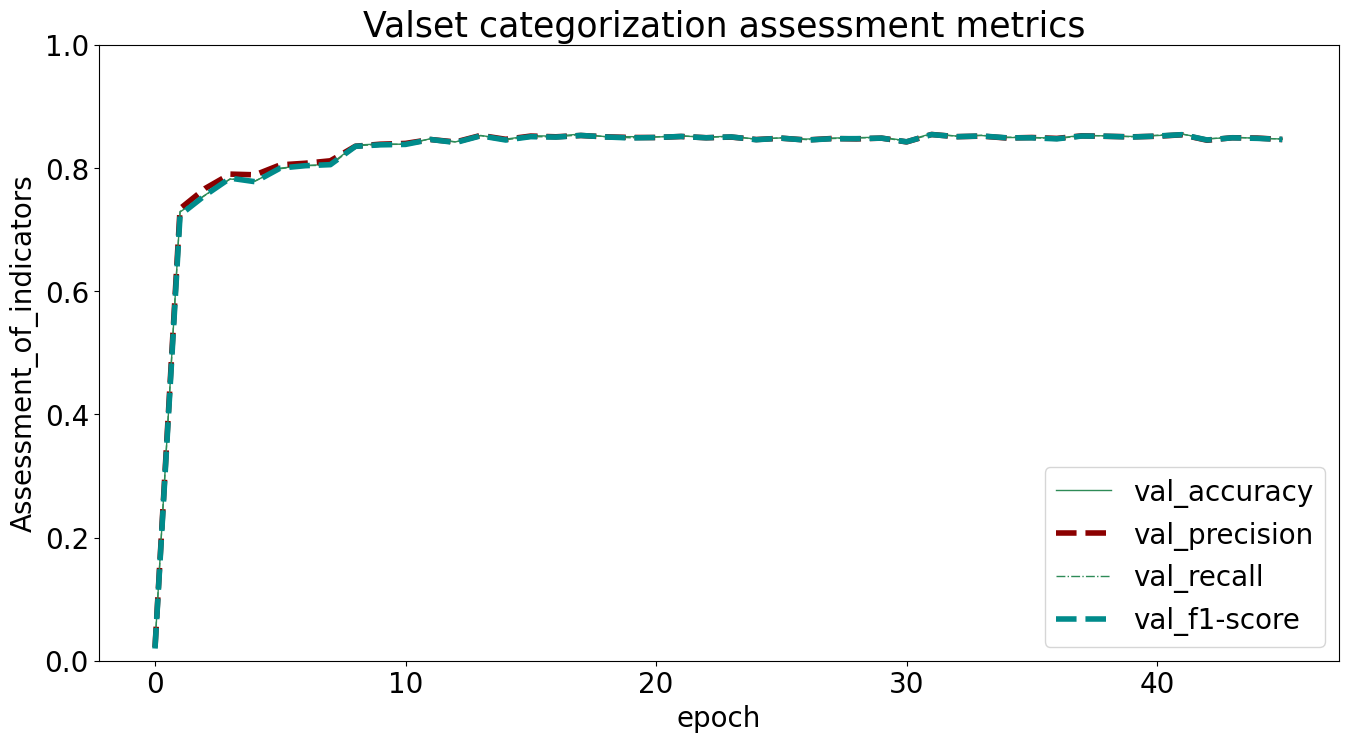

In [79]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# Mymodl

In [ ]:
!pip install torchsummary

In [31]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SEBlock(nn.Module):
#     def __init__(self, channels, ratio=16):
#         super(SEBlock, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.fc1 = nn.Conv2d(channels, channels // ratio, kernel_size=1, bias=False)
#         self.relu = nn.ReLU(inplace=True)
#         self.fc2 = nn.Conv2d(channels // ratio, channels, kernel_size=1, bias=False)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         out = self.avg_pool(x)
#         out = self.fc1(out)
#         out = self.relu(out)
#         out = self.fc2(out)
#         out = self.sigmoid(out)
#         return x * out

# class CBAMBlock(nn.Module):
#     def __init__(self, channels, ratio=16):
#         super(CBAMBlock, self).__init__()
#         self.channel_attention = SEBlock(channels, ratio)
#         self.spatial_attention = self.spatial_attention_layer(channels)

#     def forward(self, x):
#         out = self.channel_attention(x)
#         out = self.spatial_attention(out)
#         return x * out

#     def spatial_attention_layer(self, channels):
#         return nn.Sequential(
#             nn.AdaptiveAvgPool2d(1),
#             nn.Conv2d(channels, 1, kernel_size=1, stride=1, padding=0),
#             nn.Sigmoid()
#         )

# class MyModel(nn.Module):
#     def __init__(self, num_classes):
#         super(MyModel, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.conv_blocks = nn.Sequential(
#             self.conv_block(64, 64, 1),
#             self.conv_block(64, 128, 2),
#             self.conv_block(128, 256, 2),
#             self.conv_block(256, 512, 2),
#             self.conv_block(512, 1024, 2)
#         )
#         self.conv2 = nn.Conv2d(1024, 16, kernel_size=1, stride=2)
#         self.bn2 = nn.BatchNorm2d(16)
#         self.fc = nn.Linear(1024, num_classes)
#         self.dropout = nn.Dropout(0.3)
#         self.cbam_block = CBAMBlock(1024)

#     def forward(self, x):
#         x1 = F.relu(self.bn1(self.conv1(x)))
#         x10 = self.conv_blocks(x1)
#         x2 = F.relu(self.bn2(self.conv2(x)))
#         x = torch.cat([x1, x2], dim=1)
#         x = F.relu(self.bn1(x))
#         x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)
#         x = self.cbam_block(x)
#         x = self.conv_blocks(x)
#         x = self.dropout(x)
#         x_ = 0.7 * x + 0.3 * x10
#         x = F.avg_pool2d(x_, kernel_size=x_.size()[2:])
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         return x

#     def conv_block(self, in_channels, out_channels, stride):
#         return nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=stride),
#             nn.BatchNorm2d(out_channels)
#         )

# model = MyModel(num_classes=44)
# print(model)



In [32]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SEBlock(nn.Module):
#     def __init__(self, in_channels, reduction_ratio=16):
#         super(SEBlock, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.fc = nn.Sequential(
#             nn.Linear(in_channels, in_channels // reduction_ratio),
#             nn.ReLU(inplace=True),
#             nn.Linear(in_channels // reduction_ratio, in_channels),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         b, c, _, _ = x.size()
#         y = self.avg_pool(x).view(b, c)
#         y = self.fc(y).view(b, c, 1, 1)
#         return x * y.expand_as(x)

# class ChannelAttention(nn.Module):
#     def __init__(self, in_channels, reduction_ratio=16):
#         super(ChannelAttention, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.max_pool = nn.AdaptiveMaxPool2d(1)
#         self.fc = nn.Sequential(
#             nn.Conv2d(in_channels, in_channels // reduction_ratio, 1, bias=False),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(in_channels // reduction_ratio, in_channels, 1, bias=False),
#         )
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         avg_out = self.fc(self.avg_pool(x))
#         max_out = self.fc(self.max_pool(x))
#         y = self.sigmoid(avg_out + max_out)
#         return x * y

# class CBAMBlock(nn.Module):
#     def __init__(self, in_channels, reduction_ratio=16):
#         super(CBAMBlock, self).__init__()
#         self.channel_attention = ChannelAttention(in_channels, reduction_ratio)
#         self.spatial_attention = SEBlock(in_channels, reduction_ratio)

#     def forward(self, x):
#         x = self.channel_attention(x)
#         x = self.spatial_attention(x)
#         return x

# class BasicBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, stride=1):
#         super(BasicBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(out_channels)
#         self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(out_channels)
#         self.cbam = CBAMBlock(out_channels)

#         self.shortcut = nn.Sequential()
#         if stride != 1 or in_channels != out_channels:
#             self.shortcut = nn.Sequential(
#                 nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(out_channels)
#             )

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.bn2(self.conv2(out))
#         out += self.shortcut(x)
#         out = F.relu(out)
#         out = self.cbam(out)
#         return out

# class ResNet(nn.Module):
#     def __init__(self, block, num_blocks, num_classes=44):
#         super(ResNet, self).__init__()
#         self.in_channels = 64
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
#         self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(512, num_classes)

#     def _make_layer(self, block, out_channels, num_blocks, stride):
#         strides = [stride] + [1] * (num_blocks - 1)
#         layers = []
#         for stride in strides:
#             layers.append(block(self.in_channels, out_channels, stride))
#             self.in_channels = out_channels
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.layer1(out)
#         out = self.layer2(out)
#         out = self.layer3(out)
#         out = self.layer4(out)
#         out = self.avg_pool(out)
#         out = out.view(out.size(0), -1)
#         out = self.fc(out)
#         return out

# def ResNet18():
#     return ResNet(BasicBlock, [2, 2, 2, 2])

# # 使用示例：
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = ResNet18().to(device)
# print(model)



# Load pre-trained EfficientNet
model = models.efficientnet_b7(pretrained=True)
num_classes = 44  # Set the number of output classes based on your dataset
last_layer_input_size = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(last_layer_input_size, num_classes)

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-dcc49843.pth" to /home/featurize/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-dcc49843.pth
100%|██████████| 255M/255M [00:00<00:00, 554MB/s] 


In [33]:
optimizer = optim.Adam(model.parameters())

In [34]:
model = model.to(device)

criterion = nn.CrossEntropyLoss() 

EPOCHS = 44
from torch.optim import lr_scheduler

lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [36]:
def train_one_batch(images, labels):
    
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images) 
    loss = criterion(outputs, labels) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1) 
    preds = preds.cpu().numpy()
    loss = loss.detach().cpu().numpy()
    outputs = outputs.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    log_train = {}
    log_train['epoch'] = epoch
    log_train['batch'] = batch_idx
   
    log_train['train_loss'] = loss
    log_train['train_accuracy'] = accuracy_score(labels, preds)
    log_train['train_precision'] = precision_score(labels, preds, average='macro')
    log_train['train_recall'] = recall_score(labels, preds, average='macro')
    log_train['train_f1-score'] = f1_score(labels, preds, average='macro')
    
    return log_train

In [37]:
def evaluate_valset():

    loss_list = []
    labels_list = []
    preds_list = []
    
    with torch.no_grad():
        for images, labels in val_loader: 
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images) 


            _, preds = torch.max(outputs, 1) 
            preds = preds.cpu().numpy()
            loss = criterion(outputs, labels) 
            loss = loss.detach().cpu().numpy()
            outputs = outputs.detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()

            loss_list.append(loss)
            labels_list.extend(labels)
            preds_list.extend(preds)
        
    log_val = {}
    log_val['epoch'] = epoch
    
    log_val['val_loss'] = np.mean(loss_list)
    log_val['val_accuracy'] = accuracy_score(labels_list, preds_list)
    log_val['val_precision'] = precision_score(labels_list, preds_list, average='macro')
    log_val['val_recall'] = recall_score(labels_list, preds_list, average='macro')
    log_val['val_f1-score'] = f1_score(labels_list, preds_list, average='macro')
    
    return log_val

In [38]:
epoch = 0
batch_idx = 0
best_val_accuracy = 0

In [38]:
import pandas as pd

df_train_log = pd.DataFrame()
log_train = {}
log_train['epoch'] = 0
log_train['batch'] = 0
images, labels = next(iter(train_loader))
log_train.update(train_one_batch(images, labels))
df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)

In [39]:
df_train_log

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,3.8043203,0.0,0.0,0.0,0.0


In [40]:
df_val_log = pd.DataFrame()
log_val = {}
log_val['epoch'] = 0
log_val.update(evaluate_valset())
df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)

In [41]:
df_val_log

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,3.794938,0.027157,0.026045,0.026557,0.025489


In [42]:
import wandb

wandb.init(project='fruit44', name=time.strftime('%m%d%H%M%S'))

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

 ········································


wandb: Appending key for api.wandb.ai to your netrc file: /home/featurize/.netrc


In [ ]:
for epoch in range(1, EPOCHS+1):
    
    print(f'Epoch {epoch}/{EPOCHS}')
    
    ## 训练阶段
    model.train()
    for images, labels in tqdm(train_loader): # 获得一个 batch 的数据和标注
        batch_idx += 1
        log_train = train_one_batch(images, labels)
        df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
        # wandb.log(log_train)
        
    lr_scheduler.step()

    ## 测试阶段
    model.eval()
    log_val = evaluate_valset()
    df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
    # wandb.log(log_val)
    
    # 保存最新的最佳模型文件
    if log_val['val_accuracy'] > best_val_accuracy: 
        # 删除旧的最佳模型文件(如有)
        old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
        if os.path.exists(old_best_checkpoint_path):
            os.remove(old_best_checkpoint_path)
        # 保存新的最佳模型文件
        best_val_accuracy = log_val['val_accuracy']
        new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
        torch.save(model, new_best_checkpoint_path)
        print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))
        # best_test_accuracy = log_test['test_accuracy']

df_train_log.to_csv('Training_log_training_AlexNet.csv', index=False)
df_val_log.to_csv('Training_Log_val_AlexNet.csv', index=False)

Epoch 1/44


100%|██████████| 962/962 [02:52<00:00,  5.56it/s]



Save the new best model checkpoint/best-0.609.pth
Epoch 2/44


100%|██████████| 962/962 [02:53<00:00,  5.53it/s]



Save the new best model checkpoint/best-0.809.pth
Epoch 3/44


100%|██████████| 962/962 [02:52<00:00,  5.59it/s]



Save the new best model checkpoint/best-0.834.pth
Epoch 4/44


100%|██████████| 962/962 [02:53<00:00,  5.54it/s]



Save the new best model checkpoint/best-0.847.pth
Epoch 5/44


100%|██████████| 962/962 [02:57<00:00,  5.43it/s]


Epoch 7/44


100%|██████████| 962/962 [02:54<00:00,  5.50it/s]



Save the new best model checkpoint/best-0.851.pth
Epoch 8/44


100%|██████████| 962/962 [02:54<00:00,  5.51it/s]



Save the new best model checkpoint/best-0.916.pth
Epoch 9/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]



Save the new best model checkpoint/best-0.920.pth
Epoch 10/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 11/44


100%|██████████| 962/962 [02:53<00:00,  5.54it/s]



Save the new best model checkpoint/best-0.921.pth
Epoch 12/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]



Save the new best model checkpoint/best-0.925.pth
Epoch 13/44


100%|██████████| 962/962 [02:53<00:00,  5.55it/s]



Save the new best model checkpoint/best-0.928.pth
Epoch 14/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 15/44


100%|██████████| 962/962 [02:53<00:00,  5.54it/s]



Save the new best model checkpoint/best-0.932.pth
Epoch 16/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 17/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 18/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]



Save the new best model checkpoint/best-0.933.pth
Epoch 19/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 20/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 21/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 22/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 23/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 24/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 25/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]



Save the new best model checkpoint/best-0.934.pth
Epoch 26/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 27/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 28/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 29/44


100%|██████████| 962/962 [02:51<00:00,  5.60it/s]


Epoch 30/44


100%|██████████| 962/962 [02:52<00:00,  5.59it/s]


Epoch 31/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 32/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 33/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 34/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


Epoch 35/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 36/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 37/44


100%|██████████| 962/962 [02:52<00:00,  5.59it/s]


Epoch 38/44


100%|██████████| 962/962 [02:53<00:00,  5.56it/s]


Epoch 39/44


100%|██████████| 962/962 [02:52<00:00,  5.56it/s]


Epoch 40/44


100%|██████████| 962/962 [02:52<00:00,  5.56it/s]


Epoch 41/44


100%|██████████| 962/962 [02:52<00:00,  5.58it/s]


Epoch 42/44


100%|██████████| 962/962 [02:52<00:00,  5.56it/s]


Epoch 43/44


100%|██████████| 962/962 [02:52<00:00,  5.56it/s]


Epoch 44/44


100%|██████████| 962/962 [02:52<00:00,  5.57it/s]


In [39]:
# model = torch.load('checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))
model = torch.load('checkpoint/best-0.934.pth'.format(best_val_accuracy))

In [40]:
model.eval()
print(evaluate_valset())

{'epoch': 0, 'val_loss': 0.28612828, 'val_accuracy': 0.9299406663623916, 'val_precision': 0.9297764715395304, 'val_recall': 0.9294764641989761, 'val_f1-score': 0.9294794665978671}


In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_train = pd.read_csv('Training_log_training_EfficientNet.csv')
df_val = pd.read_csv('Training_Log_val_EfficientNet.csv')

In [7]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,3.804320,0.00000,0.000000,0.000000,0.000000
1,1,1,3.667105,0.12500,0.054598,0.080460,0.063875
2,1,2,3.753148,0.06250,0.036036,0.040541,0.031532
3,1,3,3.772495,0.06250,0.029412,0.044118,0.034314
4,1,4,3.551420,0.25000,0.142262,0.232143,0.159694
...,...,...,...,...,...,...,...
42324,44,42324,0.236436,0.93750,0.862069,0.862069,0.862069
42325,44,42325,0.033956,1.00000,1.000000,1.000000,1.000000
42326,44,42326,0.087602,0.96875,0.928571,0.952381,0.936508
42327,44,42327,0.159925,0.93750,0.937500,0.923611,0.922222


In [8]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,3.794938,0.027157,0.026045,0.026557,0.025489
1,1,1.610848,0.609425,0.722054,0.609487,0.628864
2,2,0.749175,0.808991,0.818486,0.808775,0.806973
3,3,0.605258,0.834322,0.839042,0.833895,0.833371
4,4,0.572825,0.846988,0.853082,0.847215,0.847049
5,5,0.669773,0.836034,0.847786,0.834246,0.836955
6,6,0.649020,0.831698,0.840627,0.830730,0.830304
7,7,0.582896,0.851209,0.857852,0.850178,0.850739
8,8,0.330366,0.916362,0.917447,0.916520,0.916684
9,9,0.320826,0.919785,0.920525,0.919307,0.919608


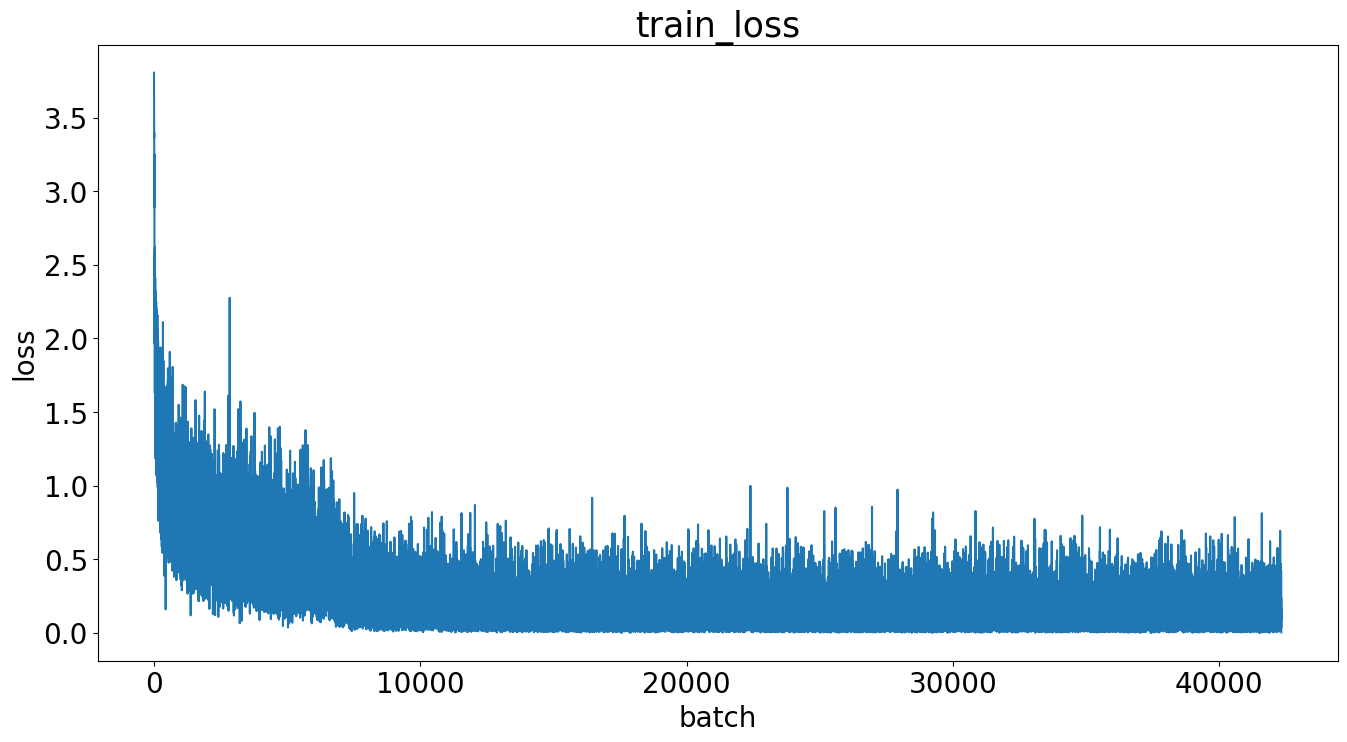

In [9]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

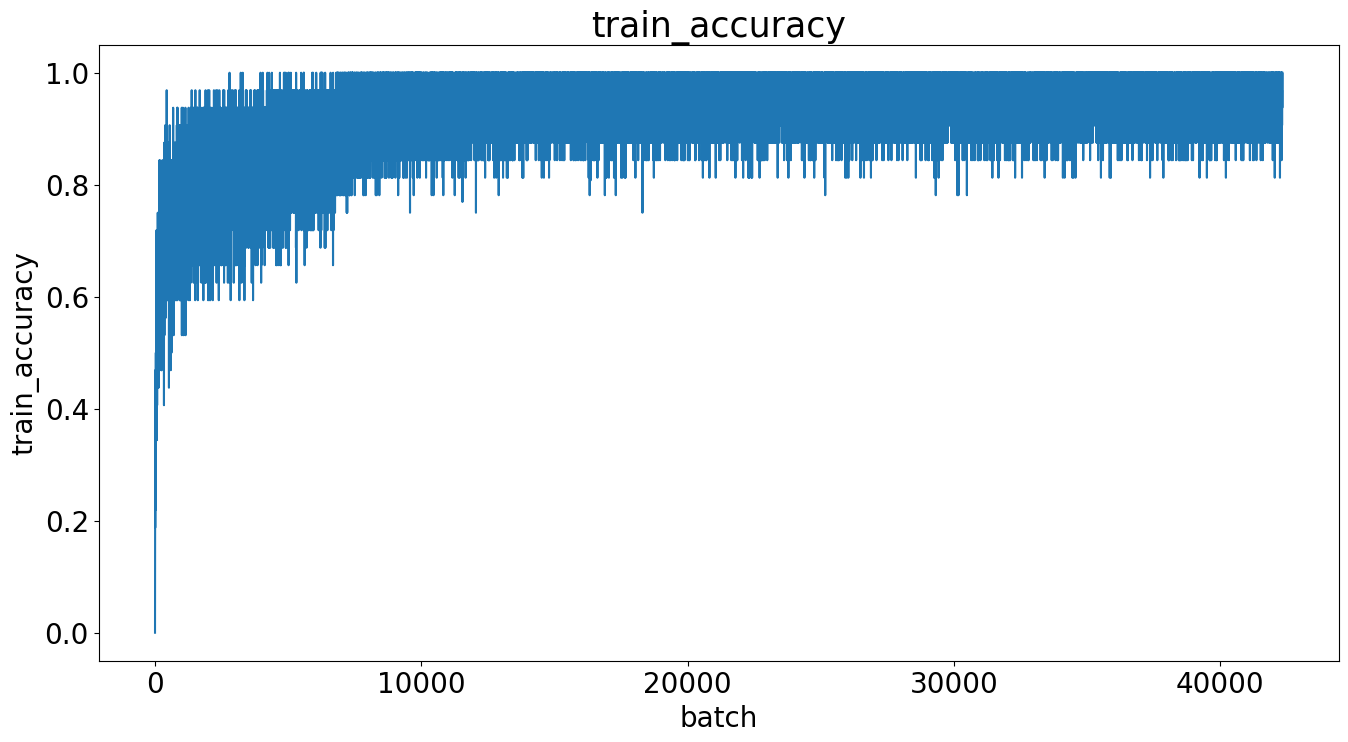

In [10]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=600, bbox_inches='tight')

plt.show()

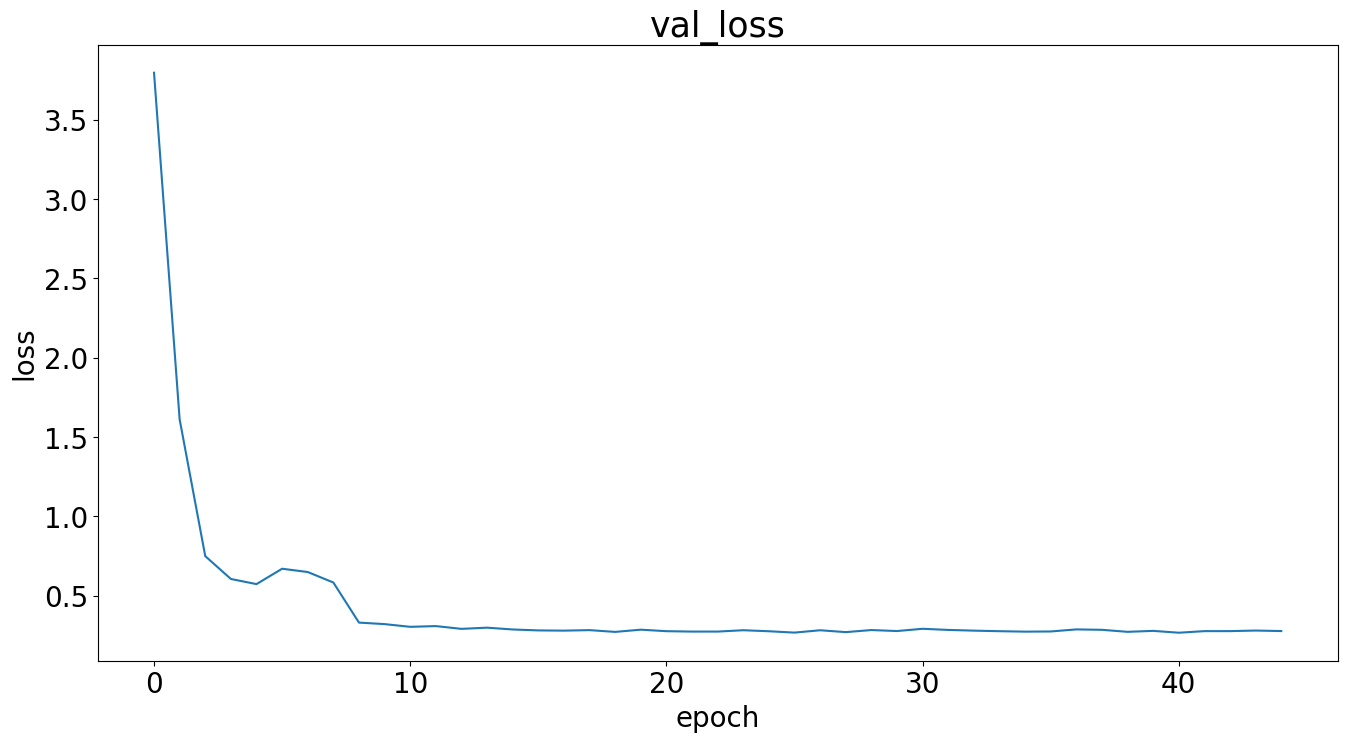

In [11]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

In [12]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [13]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

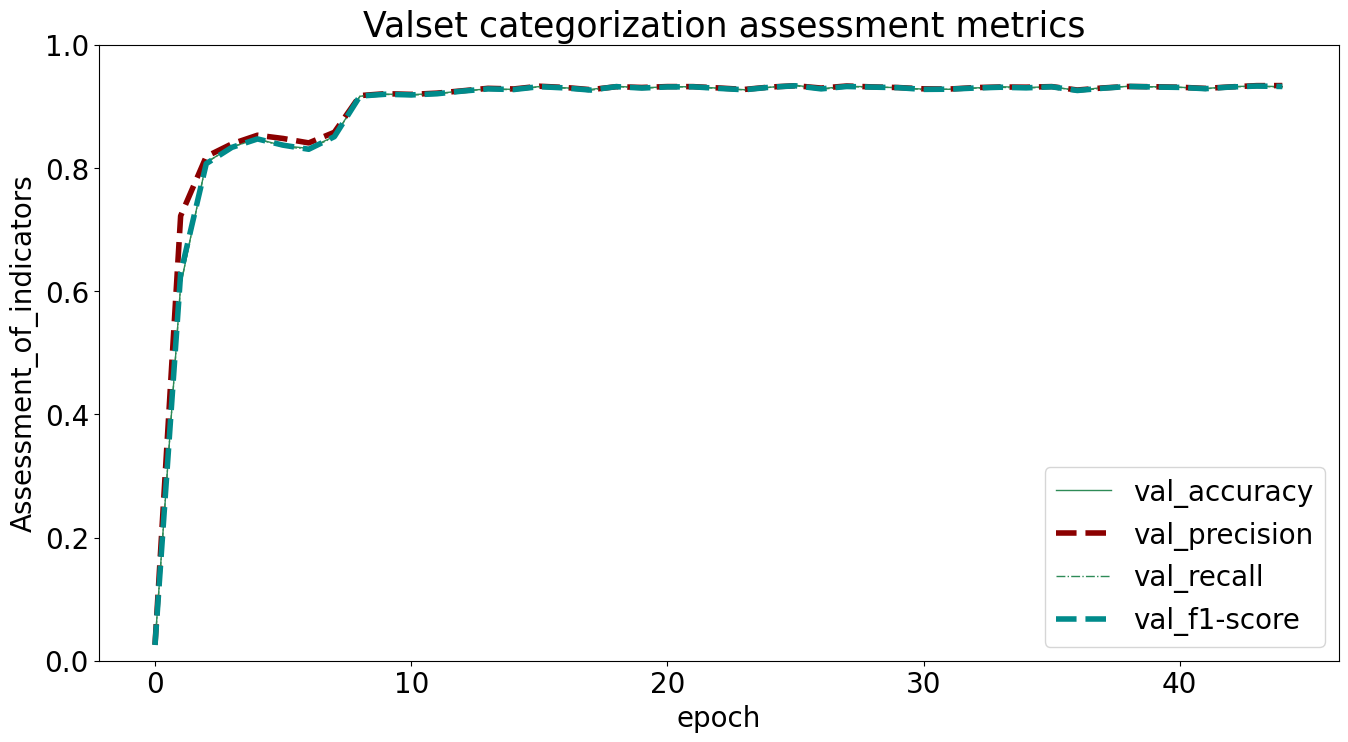

In [14]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=600, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()